In [1]:
library(Seurat)
library(SeuratDisk)
library(dplyr)
library(ggpubr)
library(ggplot2)

project <- Sys.getenv('WORKSPACE_NAMESPACE')
workspace <- Sys.getenv('WORKSPACE_NAME')
bucket <- Sys.getenv('WORKSPACE_BUCKET')

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2



Warning message:
“Unknown file type: h5ad”
Warning message:
“'assay' not set, setting to 'RNA'”
Creating h5Seurat file for version 3.1.5.9900

Adding X as scale.data

Adding raw/X as data

Adding raw/X as counts

Adding meta.features from raw/var

Adding dispersions from scaled feature-level metadata

Adding dispersions_norm from scaled feature-level metadata

Adding highly_variable from scaled feature-level metadata

Adding highly_variable_intersection from scaled feature-level metadata

Adding highly_variable_nbatches from scaled feature-level metadata

Adding mean from scaled feature-level metadata

Adding means from scaled feature-level metadata

Merging mt from scaled feature-level metadata

Merging n_cells from scaled feature-level metadata

Merging ribo from scaled feature-level metadata

Adding std from scaled feature-level metadata

Adding X_pca as cell embeddings for pca

Adding X_pca_harmony as cell embeddings for pca_harmony

Adding X_umap as cell embeddings for umap

Addin

An object of class Seurat 
14568 features across 5486 samples within 1 assay 
Active assay: RNA (14568 features, 0 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, pca_harmony, umap

PC_ 1 
Positive:  SLC24A3, KIT, IL18R1, MEIS2, PBX1 
Negative:  DOCK4, SLC16A10, SAT1, CTSB, TYMP 
PC_ 2 
Positive:  KIT, NTM, CDK15, SLC24A3, TNIK 
Negative:  SRGAP1, NR4A1, NR4A3, AREG, S100A6 
PC_ 3 
Positive:  FTL, LGALS1, TMSB10, RPLP1, RPL35A 
Negative:  FKBP5, HDAC9, SRGAP1, PSTPIP2, MS4A4E 
PC_ 4 
Positive:  SYTL3, AREG, NR4A3, CCSER1, RGS1 
Negative:  F13A1, COLEC12, MAMDC2, FN1, LYVE1 
PC_ 5 
Positive:  JAML, SLC38A1, FLT3, TMSB10, PPP1R16B 
Negative:  ELL2, TFRC, SAMD4A, ZNF331, MMP19 


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
01:05:14 UMAP embedding parameters a = 0.9922 b = 1.112

01:05:14 Read 5486 rows and found 10 numeric columns

01:05:14 Using Annoy for neighbor search, n_neighbors = 30

01:05:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

01:05:15 Writing NN index file to temp file /tmp/RtmpcD9Pzu/fileff52dba262

01:05:15 Searching Annoy index using 1 thread, search_k = 3000

01:05:17 Annoy recall = 100%

01:05:18 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 3

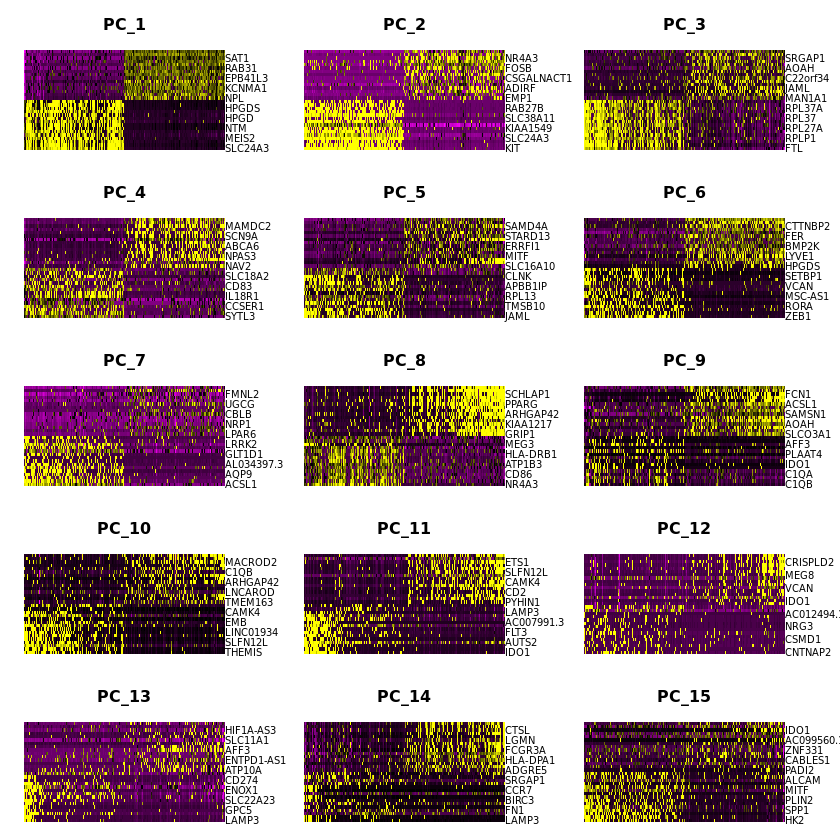

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5486
Number of edges: 186800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8999
Number of communities: 9
Elapsed time: 1 seconds
ATAGCATGTAGCTGGT-1-0 TCCTCAATCATTAGCA-1-0 GCTAACCCAACGTGCT-1-0 
                   7                    8                    2 
GGATTTATCATCGTTT-1-0 CTGCTACTCAAGACTC-1-0 
                   2                    0 
Levels: 0 1 2 3 4 5 6 7 8


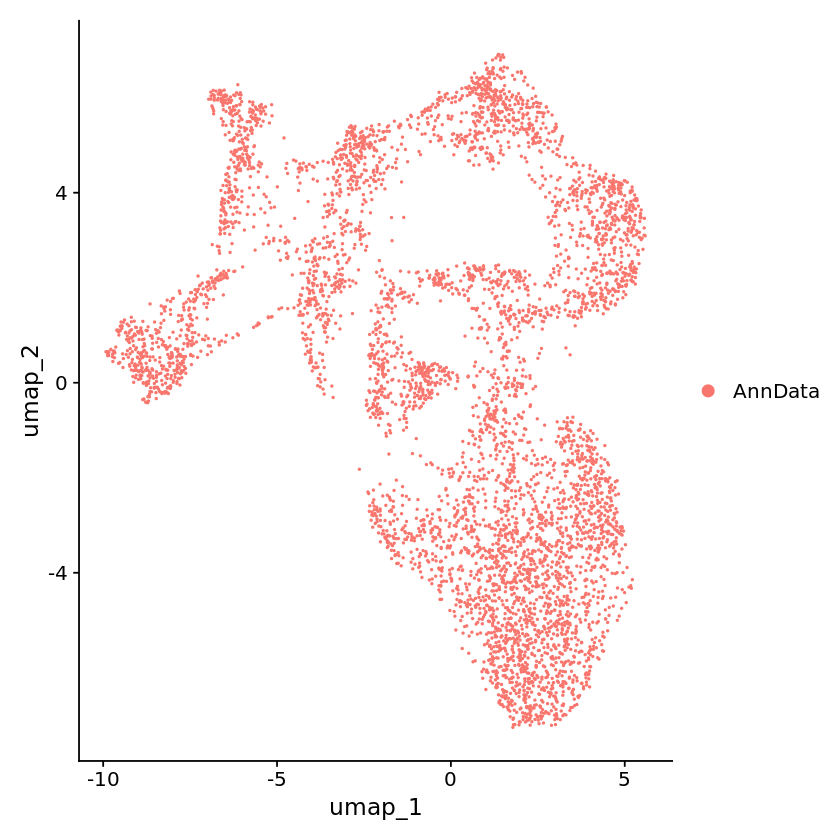

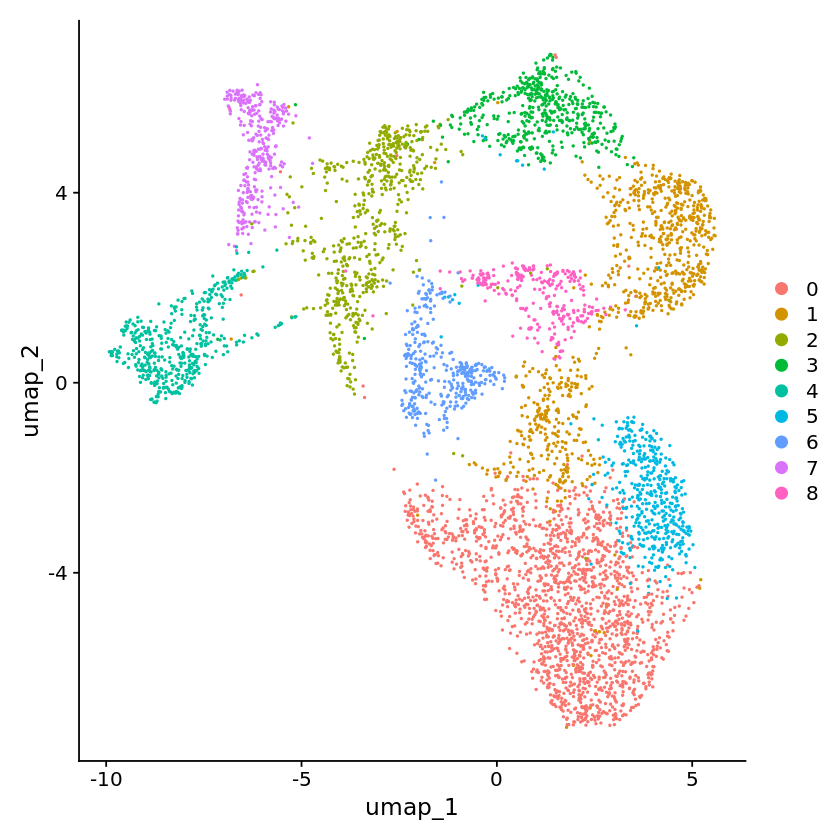

In [2]:
Convert("harmonized_myeloid_only_annotated.h5ad", dest = "h5seurat", overwrite = TRUE)
macro <- LoadH5Seurat("harmonized_myeloid_only_annotated.h5seurat",meta.data = FALSE, misc = FALSE)
macro

print(macro[["pca"]], dims = 1:5, nfeatures = 5)
DimHeatmap(macro, dims = 1:15, cells = 500, balanced = TRUE)
macro<-RunUMAP(macro, dims = 1:10)


DimPlot(macro, reduction = "umap")
macro <- FindNeighbors(macro, dims = 1:10)
macro <- FindClusters(macro, resolution = 0.35)
print(head(Idents(macro), 5))
DimPlot(macro, reduction = "umap")

In [5]:
macro.markers <- FindAllMarkers(macro, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
macro.markers %>%
    group_by(cluster) %>%
    slice_max(n = 2, order_by = avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.525574e-254,4.359585,0.374,0.027,2.222456e-250,0,SPP1
6.230783e-238,4.052802,0.412,0.059,9.077005e-234,0,CTSL
4.944560e-87,2.746050,0.426,0.165,7.203235e-83,1,NR4A3
7.779440e-135,2.562666,0.424,0.105,1.133309e-130,1,PALD1
5.615206e-172,4.041446,0.302,0.026,8.180231e-168,2,PRICKLE2
9.890678e-146,3.885425,0.253,0.020,1.440874e-141,2,PDLIM3
8.272161e-285,4.766860,0.508,0.043,1.205088e-280,3,MAMDC2
4.762351e-242,4.665549,0.477,0.049,6.937793e-238,3,MPPED2
0.000000e+00,7.218226,0.411,0.008,0.000000e+00,4,SLC38A11


In [24]:
macro

An object of class Seurat 
14568 features across 4388 samples within 1 assay 
Active assay: RNA (14568 features, 0 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [25]:
library(msigdbr)
library(fgsea)
library(dplyr)
library(ggplot2)

msigdbr_show_species()

Warning message:
“'msigdbr_show_species' is deprecated.
Use 'msigdbr_species' instead.
See help("Deprecated")”


[1] "Anolis carolinensis"             "Bos taurus"                     
 [3] "Caenorhabditis elegans"          "Canis lupus familiaris"         
 [5] "Danio rerio"                     "Drosophila melanogaster"        
 [7] "Equus caballus"                  "Felis catus"                    
 [9] "Gallus gallus"                   "Homo sapiens"                   
[11] "Macaca mulatta"                  "Monodelphis domestica"          
[13] "Mus musculus"                    "Ornithorhynchus anatinus"       
[15] "Pan troglodytes"                 "Rattus norvegicus"              
[17] "Saccharomyces cerevisiae"        "Schizosaccharomyces pombe 972h-"
[19] "Sus scrofa"                      "Xenopus tropicalis"

In [26]:
m_df<- msigdbr(species = "Homo sapiens", category = "H")

#head(m_df)
fgsea_sets<- m_df %>% split(x = .$gene_symbol, f = .$gs_name)
fgsea_sets$HALLMARK_INTERFERON_ALPHA_RESPONSE

[1] "ADAR"     "B2M"      "B2M"      "BATF2"    "BST2"     "C1S"     
  [7] "CASP1"    "CASP8"    "CCRL2"    "CD47"     "CD74"     "CMPK2"   
 [13] "CMTR1"    "CNP"      "CSF1"     "CXCL10"   "CXCL11"   "DDX60"   
 [19] "DHX58"    "EIF2AK2"  "ELF1"     "EPSTI1"   "GBP2"     "GBP4"    
 [25] "GMPR"     "HELZ2"    "HERC6"    "HLA-C"    "HLA-C"    "HLA-C"   
 [31] "HLA-C"    "HLA-C"    "HLA-C"    "HLA-C"    "IFI27"    "IFI27"   
 [37] "IFI30"    "IFI35"    "IFI44"    "IFI44L"   "IFIH1"    "IFIT2"   
 [43] "IFIT3"    "IFITM1"   "IFITM2"   "IFITM3"   "IL15"     "IL4R"    
 [49] "IL7"      "IRF1"     "IRF2"     "IRF7"     "IRF7"     "IRF9"    
 [55] "IRF9"     "ISG15"    "ISG20"    "LAMP3"    "LAP3"     "LGALS3BP"
 [61] "LPAR6"    "LY6E"     "LY6E"     "MOV10"    "MVB12A"   "MX1"     
 [67] "NCOA7"    "NMI"      "NUB1"     "OAS1"     "OASL"     "OGFR"    
 [73] "PARP12"   "PARP14"   "PARP9"    "PLSCR1"   "PNPT1"    "PROCR"   
 [79] "PSMA3"    "PSMB8"    "PSMB8"    "PSMB8"    "PSMB8"    "PSMB8"   
 [85] "PSMB8"    "PSMB8"    "PSMB8"    "PSMB9"    "PSMB9"    "PSMB9"   
 [91] "PSMB9"    "PSMB9"    "PSMB9"    "PSMB9"    "PSMB9"    "PSME1"   
 [97] "PSME1"    "PSME2"    "PSME2"    "RIPK2"    "RNF31"    "RNF31"   
[103] "RSAD2"    "RTP4"     "SAMD9"    "SAMD9L"   "SELL"     "SLC25A28"
[109] "SP110"    "STAT2"    "TAP1"     "TAP1"     "TAP1"     "TAP1"    
[115] "TAP1"     "TAP1"     "TAP1"     "TAP1"     "TDRD7"    "TENT5A"  
[121] "TMEM140"  "TRAFD1"   "TRIM14"   "TRIM21"   "TRIM25"   "TRIM26"  
[127] "TRIM26"   "TRIM26"   "TRIM26"   "TRIM26"   "TRIM26"   "TRIM26"  
[133] "TRIM26"   "TRIM26"   "TRIM5"    "TXNIP"    "UBA7"     "UBE2L6"  
[139] "USP18"    "WARS1"

In [33]:
## change to response
#macro@meta.data$response<- rownames(macro@meta.data)
#macro@meta.data

#nr <- c("-0","-1","-2","-3","-4","-5","-6","-7")
#r <- c("-8","-9","-10","-11","-12","-13")

#for (i in nr) {
#  macro@meta.data[endsWith(macro@meta.data$response,(i)),]$response <- 1
#}

#for (i in r) {
#  macro@meta.data[endsWith(macro@meta.data$response,(i)),]$response <- 0
#}

#macro@meta.data

library(presto)

macro.genes <- wilcoxauc(macro, 'seurat_clusters')
#macro.genes <- wilcoxauc(macro, 'response')
head(macro.genes)

Loading required package: Rcpp

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




,feature,group,avgExpr,logFC,statistic,auc,pval,padj,pct_in,pct_out
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AL627309.5,0,0.023064901,0.010604380,2285475,0.5029350,0.066536131,0.113807487,1.43283582,0.8477700
2,LINC01409,0,0.035643580,-0.039261245,2232616,0.4913029,0.001508081,0.004036326,2.14925373,3.8702543
3,LINC01128,0,0.144183652,0.033339244,2324897,0.5116101,0.003096355,0.007745140,8.29850746,5.9343900
4,LINC00115,0,0.013426237,0.003316245,2285603,0.5029632,0.022802956,0.045116592,1.07462687,0.4791743
5,FAM41C,0,0.001479982,-0.002810518,2267633,0.4990088,0.134863765,0.206853582,0.05970149,0.2580170
6,SAMD11,0,0.001986309,-0.004240867,2265638,0.4985697,0.090374049,0.147929118,0.11940299,0.4054552


In [34]:
dplyr::count(macro.genes, group)

group,n
<chr>,<int>
0,14568
1,14568
2,14568
3,14568
5,14568
7,14568


In [39]:
new_list = list('ALDH3A1', 'BST2',
                'CA2', 'CCNA1' ,'CD59', 'CXCL1' ,'CXCL10' ,'DAZ1' ,'DCN' ,'FLJ20035', 'FLJ38348', 'G1P2' ,
                'G1P3' ,'GALC', 'HERC6', 'HLA-B', 'HLA-G', 'HSD17B1' ,'IFI27',
                'IFI35', 'IFI44' ,'IFI44L' ,'IFIT1' ,'IFIT3', 'IFITM1', 'IGF2',
                'IRF7', 'LAMP3', 'LGALS3BP' ,'LY6E' ,'MCL1', 'MX1','MX2', 'OAS1',
                'OAS3', 'OASL' ,'PLSCR1', 'RAP2C' ,'ROBO1' ,'SERPINB2' ,'SH3YL1' ,'SLC6A15' ,'STAT1', 
                'THBS1' ,'TIMP3' ,'TncRNA', 'TRIM14' ,'USP18', 'ZNF273')
fgsea_sets$GENE_SET_49_IRDS<-new_list
fgsea_sets

$HALLMARK_ADIPOGENESIS
  [1] "ABCA1"    "ABCB8"    "ACAA2"    "ACADL"    "ACADM"    "ACADS"   
  [7] "ACLY"     "ACO2"     "ACOX1"    "ADCY6"    "ADIG"     "ADIPOQ"  
 [13] "ADIPOR2"  "ADIPOR2"  "AGPAT3"   "AIFM1"    "AK2"      "ALDH2"   
 [19] "ALDOA"    "ANGPT1"   "ANGPTL4"  "APLP2"    "APOE"     "ARAF"    
 [25] "ARL4A"    "ATL2"     "ATP1B3"   "ATP5PO"   "BAZ2A"    "BCKDHA"  
 [31] "BCL2L13"  "BCL6"     "C3"       "CAT"      "CAVIN1"   "CAVIN2"  
 [37] "CCNG2"    "CD151"    "CD302"    "CD36"     "CDKN2C"   "CHCHD10" 
 [43] "CHCHD10"  "CHCHD10"  "CHUK"     "CIDEA"    "CMBL"     "CMPK1"   
 [49] "COL15A1"  "COL4A1"   "COQ3"     "COQ5"     "COQ9"     "COX6A1"  
 [55] "COX7B"    "COX8A"    "CPT2"     "CRAT"     "CS"       "CYC1"    
 [61] "CYP4B1"   "DBT"      "DDT"      "DDT"      "DECR1"    "DGAT1"   
 [67] "DGAT1"    "DGAT1"    "DHCR7"    "DHRS7"    "DHRS7B"   "DLAT"    
 [73] "DLD"      "DNAJB9"   "DNAJC15"  "DRAM2"    "ECH1"     "ECH1"    
 [79] "ECHS1"    "ELMOD3"   "ELOVL6"   "ENPP2"    "EPHX2"    "ESRRA"   
 [85] "ESYT1"    "ETFB"     "FABP4"    "FAH"      "FZD4"     "G3BP2"   
 [91] "GADD45A"  "GBE1"     "GHITM"    "GPAM"     "GPAT4"    "GPD2"    
 [97] "GPHN"     "GPX3"     "GPX4"     "GRPEL1"   "HADH"     "HIBCH"   
[103] "HSPB8"    "IDH1"     "IDH3A"    "IDH3G"    "IFNGR1"   "IMMT"    
[109] "ITGA7"    "ITIH5"    "ITSN1"    "JAGN1"    "LAMA4"    "LEP"     
[115] "LIFR"     "LIPE"     "LPCAT3"   "LPL"      "LTC4S"    "LTC4S"   
[121] "MAP4K3"   "MCCC1"    "MDH2"     "ME1"      "MGLL"     "MGST3"   
[127] "MIGA2"    "MRAP"     "MRPL15"   "MTARC2"   "MTCH2"    "MTCH2"   
[133] "MYLK"     "NABP1"    "NDUFA5"   "NDUFAB1"  "NDUFB7"   "NDUFS3"  
[139] "NDUFS3"   "NKIRAS1"  "NMT1"     "OMD"      "ORM1"     "PDCD4"   
[145] "PEMT"     "PEX14"    "PFKFB3"   "PFKL"     "PGM1"     "PHLDB1"  
[151] "PHYH"     "PIM3"     "PLIN2"    "POR"      "PPARG"    "PPM1B"   
[157] "PPP1R15B" "PRDX3"    "PREB"     "PTCD3"    "PTGER3"   "QDPR"    
[163] "RAB34"    "REEP5"    "REEP6"    "RETN"     "RETSAT"   "RIOK3"   
[169] "RMDN3"    "RNF11"    "RREB1"    "RTN3"     "SAMM50"   "SCARB1"  
[175] "SCP2"     "SDHB"     "SDHC"     "SLC19A1"  "SLC1A5"   "SLC25A1" 
[181] "SLC25A10" "SLC27A1"  "SLC5A6"   "SLC66A3"  "SNCG"     "SOD1"    
[187] "SORBS1"   "SOWAHC"   "SPARCL1"  "SQOR"     "SSPN"     "STAT5A"  
[193] "STOM"     "SUCLG1"   "SULT1A1"  "TALDO1"   "TANK"     "TKT"     
[199] "TOB1"     "TST"      "UBC"      "UBQLN1"   "UCK1"     "UCP2"    
[205] "UQCR10"   "UQCR11"   "UQCRC1"   "UQCRQ"    "VEGFB"    "YWHAG"   

$HALLMARK_ALLOGRAFT_REJECTION
  [1] "AARS1"    "ABCE1"    "ABI1"     "ACHE"     "ACVR2A"   "AKT1"    
  [7] "APBB1"    "B2M"      "B2M"      "BCAT1"    "BCL10"    "BCL3"    
 [13] "BRCA1"    "C2"       "C2"       "C2"       "C2"       "C2"      
 [19] "C2"       "C2"       "CAPG"     "CARTPT"   "CCL11"    "CCL13"   
 [25] "CCL19"    "CCL2"     "CCL22"    "CCL4"     "CCL4"     "CCL4"    
 [31] "CCL5"     "CCL5"     "CCL7"     "CCND2"    "CCND3"    "CCR1"    
 [37] "CCR2"     "CCR5"     "CD1D"     "CD2"      "CD247"    "CD28"    
 [43] "CD3D"     "CD3E"     "CD3G"     "CD4"      "CD40"     "CD40LG"  
 [49] "CD47"     "CD7"      "CD74"     "CD79A"    "CD80"     "CD86"    
 [55] "CD8A"     "CD8B"     "CD96"     "CDKN2A"   "CFP"      "CRTAM"   
 [61] "CSF1"     "CSK"      "CTSS"     "CXCL13"   "CXCL9"    "CXCR3"   
 [67] "DARS1"    "DEGS1"    "DYRK3"    "EGFR"     "EIF3A"    "EIF3D"   
 [73] "EIF3J"    "EIF4G3"   "EIF5A"    "EIF5A"    "ELANE"    "ELANE"   
 [79] "ELF4"     "EREG"     "ETS1"     "F2"       "F2R"      "FAS"     
 [85] "FASLG"    "FCGR2B"   "FGR"      "FLNA"     "FYB1"     "GALNT1"  
 [91] "GBP2"     "GCNT1"    "GLMN"     "GPR65"    "GZMA"     "GZMB"    
 [97] "HCLS1"    "HDAC9"    "HIF1A"    "HLA-A"    "HLA-A"    "HLA-A"   
[103] "HLA-A"    "HLA-A"    "HLA-A"    "HLA-A"    "HLA-A"    "HLA-DMA" 
[109] "HLA-DMA"  "HLA-DMA"  "HLA-DMA"  "HLA-DMA"  "HLA-DMA"  "HLA-DMA" 
[115] "HLA-DMA"  "HLA-DMB"  "HLA-DMB"  "HLA-DMB"  "HLA-DMB

In [41]:
macro.genes %>%
  dplyr::filter(group == "0") %>%
  arrange(desc(logFC), desc(auc)) %>%
  head(n = 20)

,feature,group,avgExpr,logFC,statistic,auc,pval,padj,pct_in,pct_out
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SLC16A10,0,3.173265,2.330908,3809121,0.8382241,0.000000e+00,0.000000e+00,87.64179,27.165499
2,SLC11A1,0,2.277624,1.666615,3580718,0.7879623,3.704404e-274,2.698288e-270,76.95522,23.442683
3,DMXL2,0,2.594675,1.640000,3626314,0.7979960,4.846369e-264,2.353397e-260,87.10448,37.007003
4,ABCA1,0,2.611591,1.559923,3585386,0.7889896,2.583164e-244,9.407884e-241,86.80597,41.872466
5,DOCK4,0,3.497788,1.533796,3579754,0.7877504,3.899446e-229,8.115304e-226,94.02985,63.767048
6,HIF1A,0,2.788006,1.523597,3570914,0.7858049,1.158002e-233,2.811629e-230,87.88060,48.986362
7,FMNL2,0,2.798884,1.514624,3495444,0.7691972,1.634366e-208,2.380944e-205,87.70149,47.290822
8,ERRFI1,0,1.781432,1.425345,3393628,0.7467921,2.174456e-238,6.335495e-235,61.07463,15.296719
9,FNDC3B,0,3.038617,1.398737,3537940,0.7785487,3.061983e-216,5.575870e-213,92.17910,59.896793


In [42]:
allcluster.genes<- macro.genes %>%
  dplyr::filter(group == "0") %>%
  arrange(desc(auc)) %>% 
  dplyr::select(feature, auc)

library(tibble)
ranks<- deframe(allcluster.genes)

head(ranks)

fgseaRes<- fgsea(fgsea_sets, stats = ranks, nperm = 1000)
fgseaResTidy <- fgseaRes %>%
  as_tibble() %>%
  arrange(desc(NES))


fgseaResTidy %>% 
  dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>% 
  arrange(padj) %>% 
  head()

SLC16A10     DMXL2     ABCA1   SLC11A1     DOCK4     HIF1A 
0.8382241 0.7979960 0.7889896 0.7879623 0.7877504 0.7858049

Warning message in fgsea(fgsea_sets, stats = ranks, nperm = 1000):
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (4.61% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”


pathway,pval,padj,NES,size
<chr>,<dbl>,<dbl>,<dbl>,<int>
HALLMARK_INTERFERON_GAMMA_RESPONSE,0.001464129,0.003269231,7.472911,177
HALLMARK_INTERFERON_ALPHA_RESPONSE,0.001552795,0.003269231,6.032662,88
HALLMARK_COMPLEMENT,0.001490313,0.003269231,4.387437,155
HALLMARK_INFLAMMATORY_RESPONSE,0.001490313,0.003269231,4.346856,155
HALLMARK_HYPOXIA,0.001515152,0.003269231,4.205941,165
HALLMARK_MTORC1_SIGNALING,0.001485884,0.003269231,4.048303,181


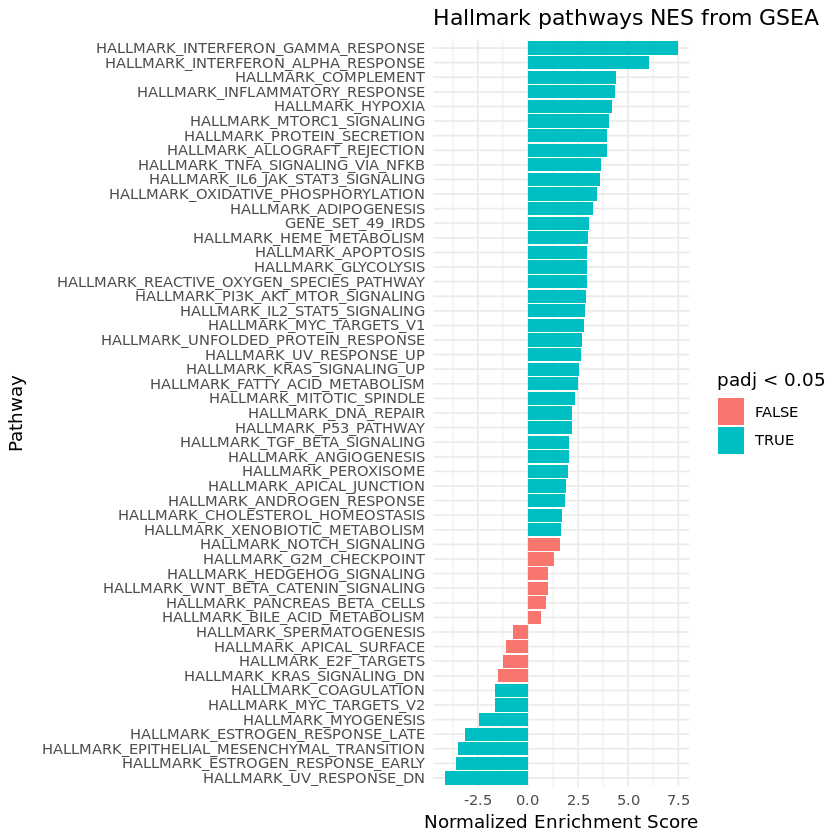

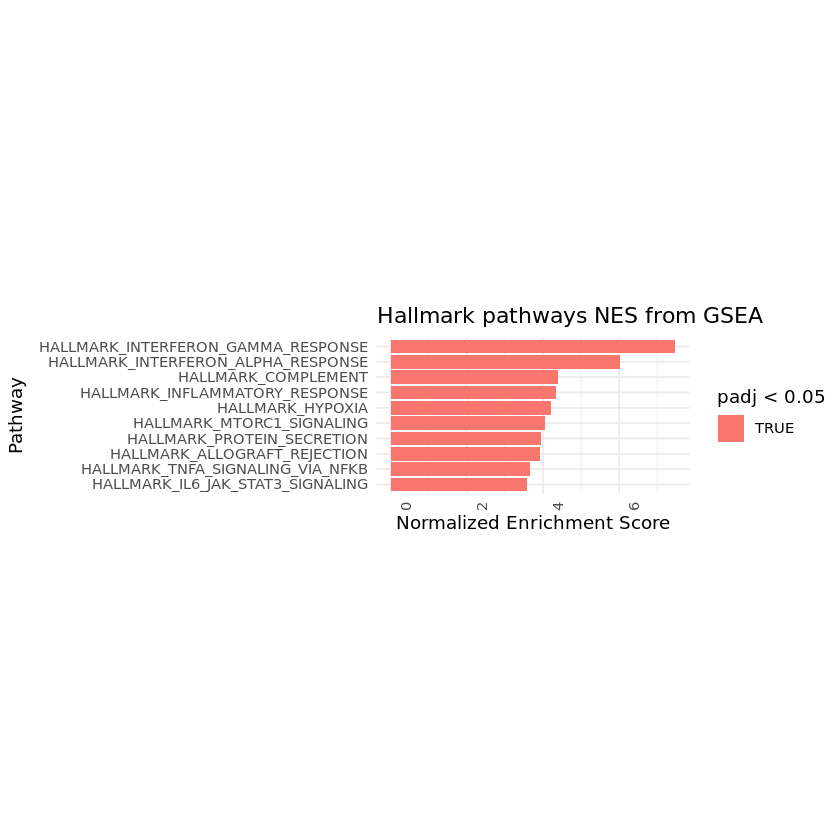

In [44]:
ggplot(fgseaResTidy , aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.05)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
  theme_minimal()

#ggsave("MacroGSEA_group0_top5_v.pdf")
#system(paste0("gsutil cp -r MacroGSEA_group0_top5_v.pdf ", bucket, "/figures/"),intern=TRUE)


ggplot(fgseaResTidy %>% head(n=10), aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.05)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
 theme_minimal()  +
theme(axis.text.x = element_text(angle = 90, vjust = 2, hjust=1),aspect.ratio = 0.5) 
#ggsave("MacroGSEA_group0_top5.pdf")
#system(paste0("gsutil cp -r MacroGSEA_group0_top5.pdf ", bucket, "/figures/"),intern=TRUE)

DONE

In [58]:
mycolors <- c("#93ccea", "#26619c")
myplot= ggplot(fgseaResTidy , aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.05)) +
  scale_fill_manual(values=mycolors) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
  theme_minimal()

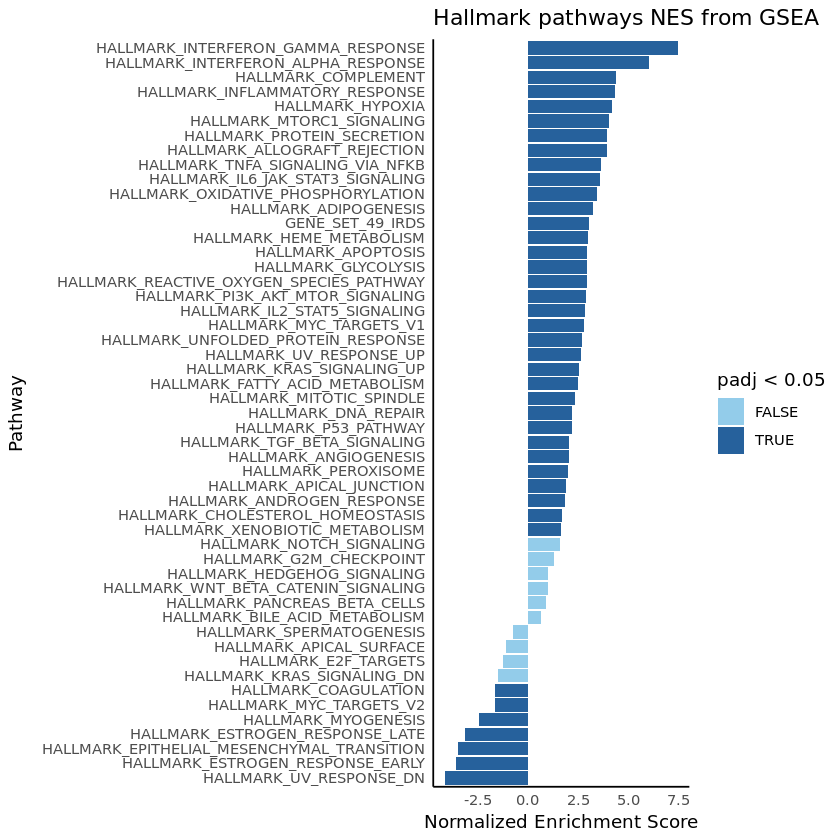

In [59]:
myplot + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))

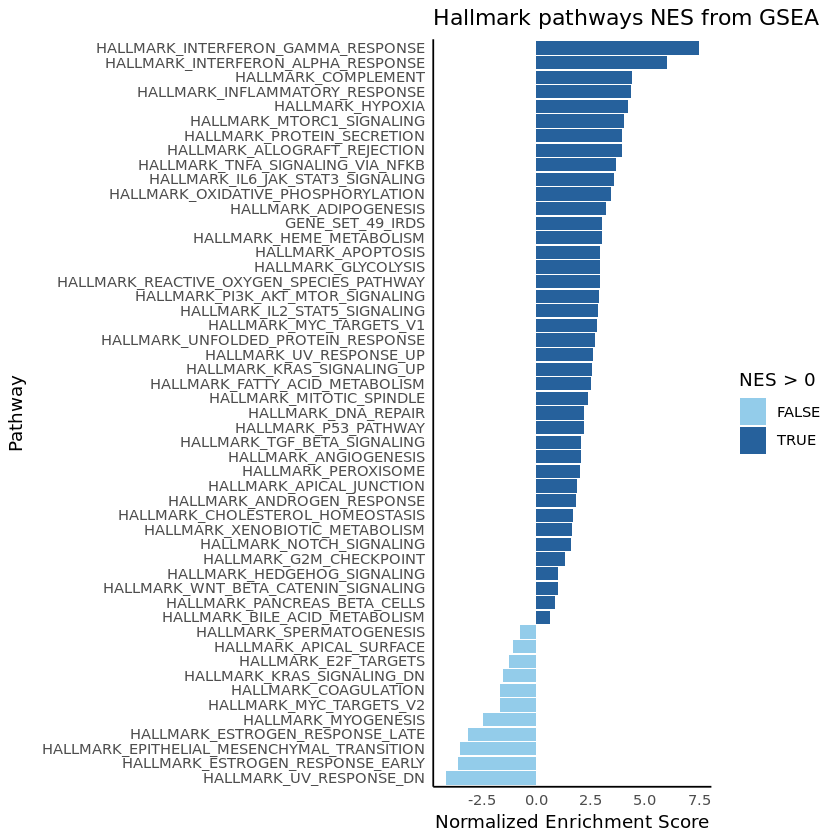

In [61]:
mycolors <- c("#93ccea", "#26619c")
myplot= ggplot(fgseaResTidy , aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=NES>0)) +
  scale_fill_manual(values=mycolors) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
  theme_minimal()

myplot + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))

the gene set from the IRDS paper
interferon alpha
interferon gamma
complement
inflamatory response
IL6_jak_Stat3
IL2, stat5
DNA repair
Myogenesis
epithelial to mesenchymal transition

In [63]:
pw<- c("HALLMARK_INTERFERON_GAMMA_RESPONSE",
      "HALLMARK_INTERFERON_ALPHA_RESPONSE",
      "HALLMARK_COMPLEMENT",
       "HALLMARK_INFLAMMATORY_RESPONSE",
       "HALLMARK_IL6_JAK_STAT3_SIGNALING",
       "GENE_SET_49_IRDS",
       "HALLMARK_IL2_STAT5_SIGNALING",
       "HALLMARK_DNA_REPAIR",
       "HALLMARK_MYOGENESIS",
       "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"
      
      )

In [65]:
fgseaResTidy<- fgseaResTidy %>% filter(pathway %in% pw)

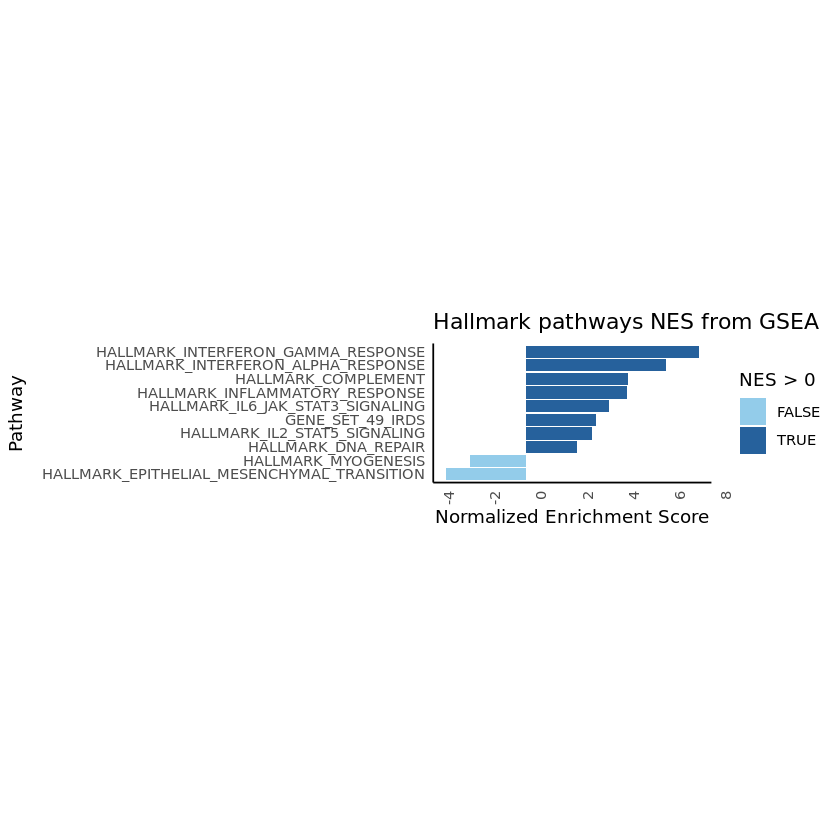

In [68]:
mycolors <- c("#93ccea", "#26619c")
myplot= ggplot(fgseaResTidy , aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=NES>0)) +
  scale_fill_manual(values=mycolors) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
  theme_minimal()+
 theme(axis.text.x = element_text(angle = 90, vjust = 2, hjust=1),aspect.ratio = 0.5) 

myplot + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))